In [1]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
import datetime as dt
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Cambio della cartella attuale nella cartella in cui si trova il file .py
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

path_cartella = r"\archive\csvs_per_year\csvs_per_year"

path = r".\\DataSet\\"
#path = path_file + path_cartella

c:\Users\chiar\OneDrive\Desktop\Progetto2DataScience\DataScience2Project


In [2]:
allMadrid = pd.read_csv(path+"out.csv")
#allMadrid = pd.read_csv(path+"\madrid_2008.csv")
allMadrid.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,NaN,0.47,NaN,NaN,11.820078,83.089996,16.990000,16.889999,10.4,8.98,NaN,NaN,28079001
1,2008-06-01 01:00:00,NaN,0.59,NaN,NaN,11.820078,94.820000,17.469999,19.040001,NaN,5.85,NaN,NaN,28079003
2,2008-06-01 01:00:00,NaN,0.55,NaN,NaN,11.820078,75.919998,13.470000,20.270000,NaN,6.95,NaN,NaN,28079004
3,2008-06-01 01:00:00,NaN,0.36,NaN,NaN,11.820078,61.029999,23.110001,10.850000,NaN,5.96,NaN,NaN,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.7,0.3,11.820078,105.199997,12.120000,37.160000,21.9,10.92,1.53,6.67,28079006


In [3]:
#allMadrid = allMadrid.drop(['date','BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'SO_2', 'TCH', 'TOL', 'PM25', 'station'], axis=1)
#allMadrid = allMadrid.drop(['date','BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'OXY', 'O_3', 'PXY', 'TCH', 'TOL', 'station'], axis=1)
allMadrid = allMadrid.drop(['date','BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL', 'station'], axis=1)
allMadrid = allMadrid.dropna(subset=['PM10'])
Livello = allMadrid['PM10']
#allMadrid = allMadrid.dropna()
allMadrid = allMadrid.drop(['PM10'], axis=1)
allMadrid.head()


,NO,NO_2,PM25,SO_2
0,11.820078,83.089996,10.4,8.98
1,11.820078,94.820000,NaN,5.85
2,11.820078,75.919998,NaN,6.95
3,11.820078,61.029999,NaN,5.96
4,11.820078,105.199997,21.9,10.92


In [ ]:
print(allMadrid)

In [4]:
#cerco i campi NaN in PM10 e li sostituisco con la media dei valori noti
#trovo il valor medio
for col in allMadrid.columns:
    if allMadrid[col].dtype != object:
        allMadrid[col]=allMadrid[col].fillna(allMadrid[col].mean())

allMadrid = allMadrid.astype(int)
#print(allMadrid['PM10'])

In [ ]:
allMadrid.head()

In [5]:
condition_list = [(Livello <= 20), (Livello > 20)]

choicelist = [0,1] 

Livello = np.select(condition_list, choicelist, default='Non Specificato')

Livello = Livello.astype(int)

print(Livello)

#Livello = pd.DataFrame(Livello, columns = ['Tolleranza'])

#Livello.value_counts()

[0 0 1 ... 1 1 1]


In [6]:
allMadrid = pd.get_dummies(allMadrid)
allMadrid.head()

,NO,NO_2,PM25,SO_2
0,11,83,10,8
1,11,94,11,5
2,11,75,11,6
3,11,61,11,5
4,11,105,21,10


In [7]:
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(allMadrid[["NO", "NO_2", "PM25", "SO_2"]])
allMadrid[["NO", "NO_2", "PM25", "SO_2"]] = scaled_d
#scaled_d = scaler.fit_transform(allMadrid[["NOx", "NO_2", "PM25", "SO_2"]])
#allMadrid[["NOx", "NO_2", "PM25", "SO_2"]] = scaled_d
allMadrid.head()

,NO,NO_2,PM25,SO_2
0,0.011458,0.149819,0.046512,0.050955
1,0.011458,0.169675,0.051163,0.031847
2,0.011458,0.135379,0.051163,0.038217
3,0.011458,0.110108,0.051163,0.031847
4,0.011458,0.189531,0.097674,0.063694


CLASSIFICAZIONE

In [ ]:
allMadrid.head()

BILANCIAMENTO DEL DATASET

In [8]:
#separazione da tollerabile a non_tollerabile
allMadrid['Livello'] = pd.Series(Livello)
non_tollerabile = allMadrid[allMadrid.Livello == 1]
tollerabile = allMadrid[allMadrid.Livello == 0]

print("Tollerabili: ", len(tollerabile), "Non tollerabili: ", len(non_tollerabile))

Tollerabili:  476982 Non tollerabili:  360911


In [10]:
#bilanciamento del dataset
balanced_d = pd.concat([non_tollerabile, tollerabile.sample(len(non_tollerabile))])
#balanced_d = pd.concat([tollerabile, non_tollerabile.sample(len(tollerabile))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(721822, 5)

In [11]:
allMadrid.head()
print(allMadrid.columns)

Index(['NO', 'NO_2', 'PM25', 'SO_2', 'Livello'], dtype='object')


ANALISI DELLE CORRELAZIONI

<Figure size 2160x1080 with 0 Axes>

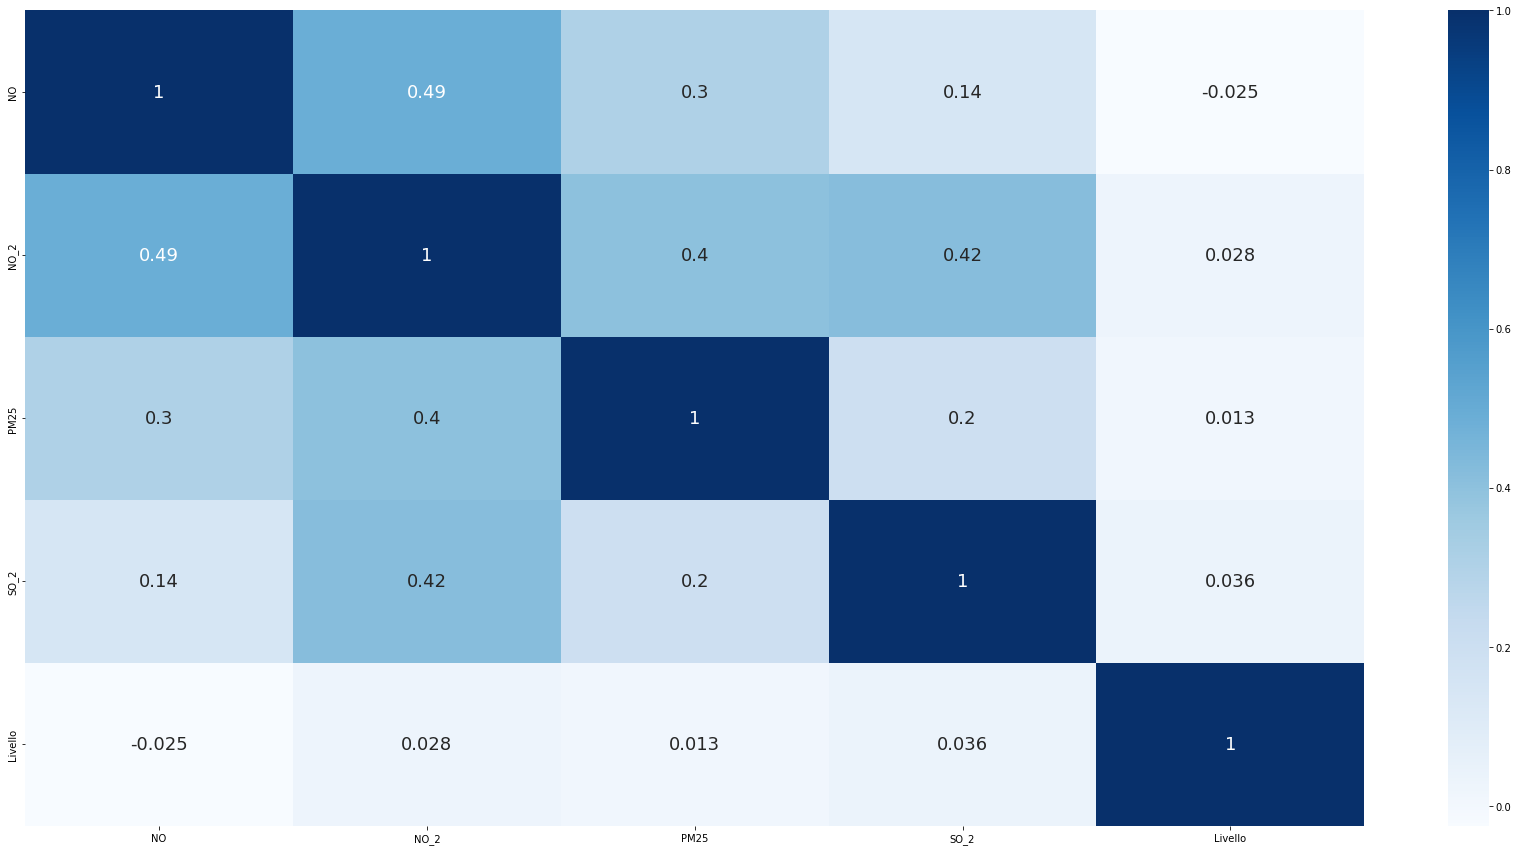

In [12]:
plt.figure(figsize=(30,15))

#x = x.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL'], axis=1)

plt.figure(figsize=(30,15))
ax = sns.heatmap(allMadrid[allMadrid.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

<Figure size 2160x1080 with 0 Axes>

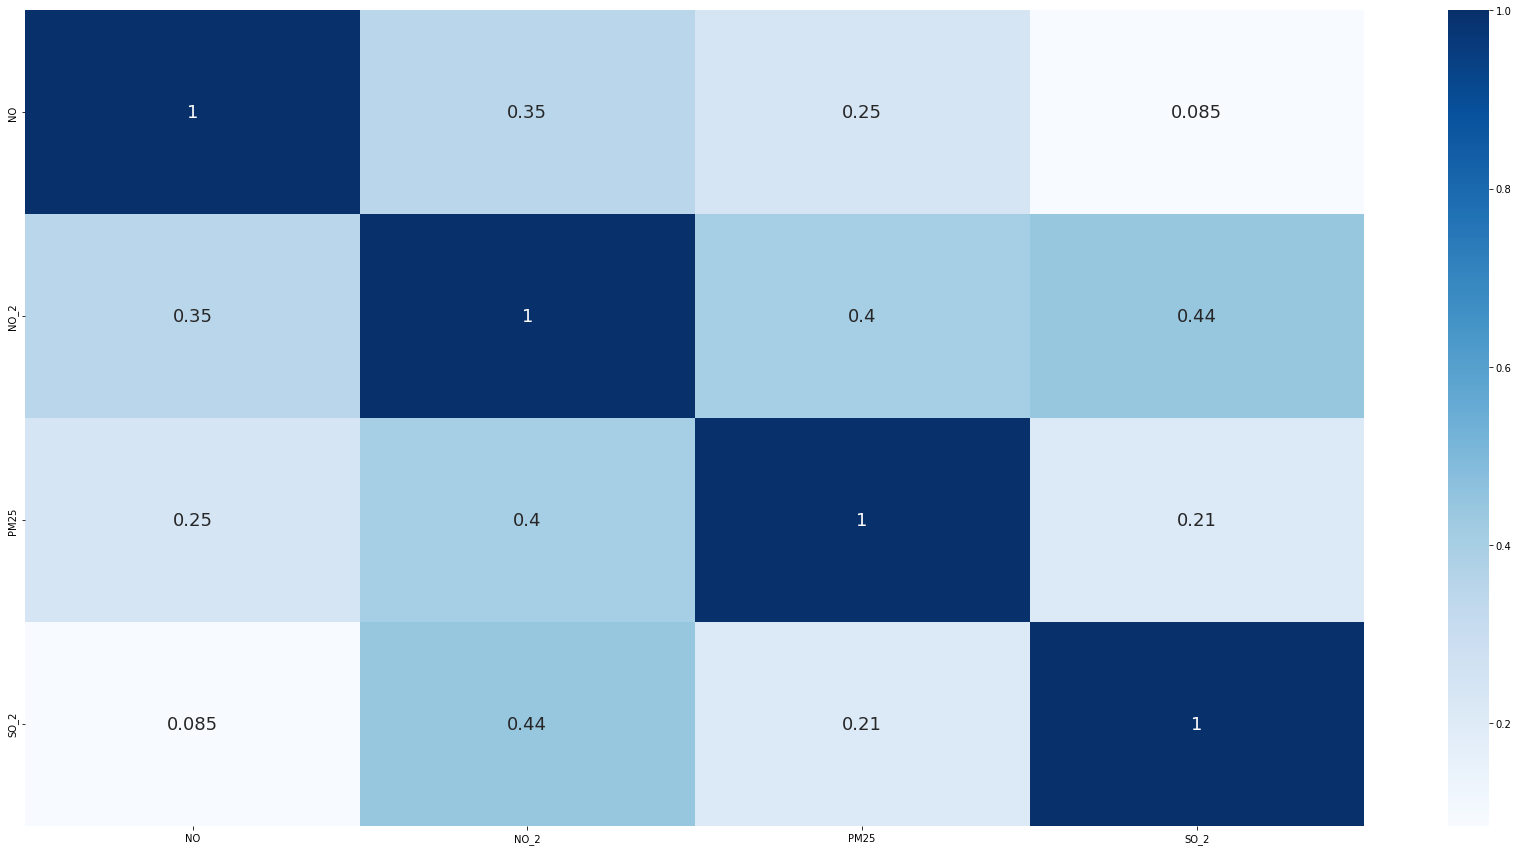

In [13]:
plt.figure(figsize=(30,15))

#x = x.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL'], axis=1)

plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [ ]:
allMadrid.head()
allMadrid.info()
allMadrid.count()

CLASSIFICAZIONE BINARIA

In [14]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(577457, 4)
(144365, 4)
(577457, 1)
(144365, 1)


CLASSIFICATORI

In [15]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis()
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

ACCURATEZZA

In [16]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.52 	 ---> LogisticRegression 
Accuracy: 0.53 	 ---> DecisionTreeClassifier 


In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")